<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Face_Detection_Using_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is Python code to implement face detection using Support Vector Machines (SVMs). This code uses a dataset of labeled face and non-face images to train an SVM classifier, then predicts whether a test image contains a face.

1. Import libraries

In [7]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
import matplotlib.pyplot as plt

2. Extracts HOG features function

In [8]:
def extract_hog_features(image_path, target_size=(64, 64)):
    """
    Extracts HOG features from an image.

    Args:
        image_path: Path to the input image.
        target_size: Desired size of the output image (width, height).

    Returns:
        HOG features as a 1D NumPy array.
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Image not found at {image_path}")

    # Resize the image
    image_resized = cv2.resize(image, target_size)

    # Extract HOG features
    features, _ = hog(
        image_resized,
        pixels_per_cell=(8, 8),
        cells_per_block=(3, 3),
        visualize=True,
        block_norm='L2-Hys'
    )
    return features

3. Load dataset

In [9]:
face_image_paths = ["/face1.jpg", "/face2.jpg", "/face3.jpg"]
non_face_image_paths = ["/nonface1.jpg", "/nonface2.jpg", "/nonface3.jpg"]

4. Extract HOG features and labels

In [10]:
X = []
y = []

for path in face_image_paths:
    try:
        X.append(extract_hog_features(path))
        y.append(1)  # Label for face
    except ValueError as e:
        print(e)

for path in non_face_image_paths:
    try:
        X.append(extract_hog_features(path))
        y.append(0)  # Label for non-face
    except ValueError as e:
        print(e)

5. Convert to NumPy arrays

In [11]:
X = np.array(X)
y = np.array(y)

6. Split the dataset into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

7. Train an SVM classifier with an RBF kernel

In [13]:
svm = SVC(kernel="rbf", C=10.0, gamma="scale", random_state=42)
svm.fit(X_train, y_train)

SVC(C=10.0, random_state=42)

8. Evaluate the classifier

In [14]:
y_pred = svm.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Accuracy: 1.00


9. Test the classifier with a new image

In [15]:
test_image_path = "/face_woman.jpg"
try:
    test_features = extract_hog_features(test_image_path)
    predicted_label = svm.predict([test_features])[0]
    result_text = "Face Detected" if predicted_label == 1 else "No Face Detected"
except ValueError as e:
    print(e)
    raise

10. Display the result

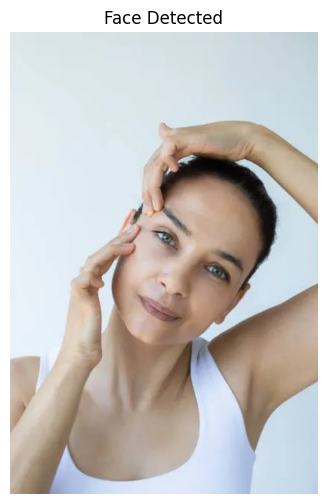

In [16]:
test_image_display = cv2.imread(test_image_path)
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(test_image_display, cv2.COLOR_BGR2RGB))
plt.title(result_text)
plt.axis("off")
plt.show()